# **1. 프로세스 동작 예측**

**1초 단위의 프로세스 별 플래그 데이터를 이용하여 LSTM 알고리즘으로 향후 프로세스 동작을 예측한다.**

In [ ]:
## 라이브러리 import

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
## 데이터 불러오기

df_orig = pd.read_csv('./Merge_Linear_20200616.csv', error_bad_lines=False,) 
df_orig.head()

INDEX        DATE      TIME  Interval  Mobile_Controller  Alarm  Game  \
0      1  2020/06/16  04:34:27     16467                0.0    0.0   0.0   
1      2  2020/06/16  04:34:29     16469                1.0    0.0   0.0   
2      3  2020/06/16  04:34:30     16470                1.0    0.0   0.0   
3      4  2020/06/16  04:34:31     16471                1.0    0.0   0.0   
4      5  2020/06/16  04:34:32     16472                1.0    0.0   0.0   

   Music  Note  Training  Video  Home_Controller  AirConditioner  DoorLock  \
0    0.0   0.0       0.0    0.0              NaN             NaN       NaN   
1    0.0   0.0       0.0    0.0              NaN             NaN       NaN   
2    0.0   0.0       0.0    0.0              NaN             NaN       NaN   
3    0.0   0.0       0.0    0.0              NaN             NaN       NaN   
4    0.0   0.0       0.0    0.0              NaN             NaN       NaN   

   Lamp  TV  Vacuum  Washer  
0   NaN NaN     NaN     NaN  
1   NaN NaN     NaN     NaN  
2   NaN NaN     NaN     NaN  
3   NaN NaN     NaN     NaN  
4   NaN NaN     NaN     NaN

---------------

## **데이터 확인 및 전처리**

In [4]:
## 필요한 칼럼만 뽑기 -> 인덱스, 알람, 전등, TV

df = df_orig[['INDEX','Alarm','Lamp','TV']]

df.head(30)

INDEX  Alarm  Lamp   TV
0       1    0.0   NaN  NaN
1       2    0.0   NaN  NaN
2       3    0.0   NaN  NaN
3       4    0.0   NaN  NaN
4       5    0.0   NaN  NaN
5       6    0.0   0.0  0.0
6       7    0.0   0.0  0.0
7       8    0.0   0.0  0.0
8       9    0.0   0.0  0.0
9      10    0.0   0.0  0.0
10     11    0.0   0.0  0.0
11     12    0.0   0.0  0.0
12     13    0.0   0.0  0.0
13     14    0.0   0.0  0.0
14     15    0.0   0.0  0.0
15     16    0.0   0.0  0.0
16     17    0.0   0.0  0.0
17     18    0.0   0.0  0.0
18     19    0.0   0.0  0.0
19     20    0.0   0.0  0.0
20     21    0.0   0.0  0.0
21     22    0.0   0.0  0.0
22     23    0.0   0.0  0.0
23     24    0.0   0.0  0.0
24     25    0.0   0.0  0.0
25     26    0.0   0.0  0.0
26     27    1.0   0.0  0.0
27     28    1.0   0.0  0.0
28     29    1.0   0.0  0.0
29     30    1.0   1.0  0.0

In [5]:
## NaN 확인
df.isna().head(30)

INDEX  Alarm   Lamp     TV
0   False  False   True   True
1   False  False   True   True
2   False  False   True   True
3   False  False   True   True
4   False  False   True   True
5   False  False  False  False
6   False  False  False  False
7   False  False  False  False
8   False  False  False  False
9   False  False  False  False
10  False  False  False  False
11  False  False  False  False
12  False  False  False  False
13  False  False  False  False
14  False  False  False  False
15  False  False  False  False
16  False  False  False  False
17  False  False  False  False
18  False  False  False  False
19  False  False  False  False
20  False  False  False  False
21  False  False  False  False
22  False  False  False  False
23  False  False  False  False
24  False  False  False  False
25  False  False  False  False
26  False  False  False  False
27  False  False  False  False
28  False  False  False  False
29  False  False  False  False

### **+전처리 함수 설명**

**(1초 전 플래그 - NaN - 1초 후 플래그)라 할 때,**


**1 - NaN - 1 인 경우 -> 1로 채우기**

**나머지 -> 0으로 채우기**

In [6]:
## 전처리 함수

def prep(df):
    
    df['Alarm'][0]=0 #시작은 일단 0
    df['Lamp'][0]=0
    df['TV'][0]=0
    
        
    for i in range(1,len(df['INDEX'])):
        df['TV'][0]=0
        
        
        # Alarm
        if pd.isna(df['Alarm'][i])==True:
        
            if (df['Alarm'][i-1]==1)and(df['Alarm'][i+1]==1):
                df['Alarm'][i]=1
            else:
                df['Alarm'][i]=0
            
        # Lamp
        if pd.isna(df['Lamp'][i])==True:
        
            if (df['Lamp'][i-1]==1)and(df['Lamp'][i+1]==1):
                df['Lamp'][i]=1
            else:
                df['Lamp'][i]=0
        
         # TV    
        if pd.isna(df['TV'][i])==True:
        
            if (df['TV'][i-1]==1)and(df['TV'][i+1]==1):
                
                df['TV'][i]=1
            else:
                df['TV'][i]=0
        

    return df
    

In [7]:
len(df['INDEX'])

6051

In [8]:
## 전처리 진행

prep(df)
df.isna().head(30)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to b

INDEX  Alarm   Lamp     TV
0   False  False  False  False
1   False  False  False  False
2   False  False  False  False
3   False  False  False  False
4   False  False  False  False
5   False  False  False  False
6   False  False  False  False
7   False  False  False  False
8   False  False  False  False
9   False  False  False  False
10  False  False  False  False
11  False  False  False  False
12  False  False  False  False
13  False  False  False  False
14  False  False  False  False
15  False  False  False  False
16  False  False  False  False
17  False  False  False  False
18  False  False  False  False
19  False  False  False  False
20  False  False  False  False
21  False  False  False  False
22  False  False  False  False
23  False  False  False  False
24  False  False  False  False
25  False  False  False  False
26  False  False  False  False
27  False  False  False  False
28  False  False  False  False
29  False  False  False  False

In [10]:
## 학습에 사용할 칼럼 만들기 -> A_L_T

df['A_L_T']='a'

for i in range(len(df['INDEX'])):
    
    df['A_L_T'][i] = str(str(int(df['Alarm'][i])) + str(int(df['Lamp'][i])) + str(int(df['TV'][i])))
    

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head(50)

INDEX  Alarm  Lamp   TV A_L_T
0       1    0.0   0.0  0.0   000
1       2    0.0   0.0  0.0   000
2       3    0.0   0.0  0.0   000
3       4    0.0   0.0  0.0   000
4       5    0.0   0.0  0.0   000
5       6    0.0   0.0  0.0   000
6       7    0.0   0.0  0.0   000
7       8    0.0   0.0  0.0   000
8       9    0.0   0.0  0.0   000
9      10    0.0   0.0  0.0   000
10     11    0.0   0.0  0.0   000
11     12    0.0   0.0  0.0   000
12     13    0.0   0.0  0.0   000
13     14    0.0   0.0  0.0   000
14     15    0.0   0.0  0.0   000
15     16    0.0   0.0  0.0   000
16     17    0.0   0.0  0.0   000
17     18    0.0   0.0  0.0   000
18     19    0.0   0.0  0.0   000
19     20    0.0   0.0  0.0   000
20     21    0.0   0.0  0.0   000
21     22    0.0   0.0  0.0   000
22     23    0.0   0.0  0.0   000
23     24    0.0   0.0  0.0   000
24     25    0.0   0.0  0.0   000
25     26    0.0   0.0  0.0   000
26     27    1.0   0.0  0.0   100
27     28    1.0   0.0  0.0   100
28     29    1.0   0.0  0.0   100
29     30    1.0   1.0  0.0   110
30     31    0.0   1.0  0.0   010
31     32    0.0   1.0  0.0   010
32     33    0.0   1.0  0.0   010
33     34    0.0   1.0  0.0   010
34     35    0.0   1.0  0.0   010
35     36    0.0   1.0  0.0   010
36     37    0.0   1.0  0.0   010
37     38    0.0   1.0  0.0   010
38     39    0.0   1.0  0.0   010
39     40    0.0   1.0  0.0   010
40     41    0.0   1.0  0.0   010
41     42    0.0   1.0  0.0   010
42     43    0.0   1.0  1.0   011
43     44    0.0   1.0  1.0   011
44     45    0.0   1.0  1.0   011
45     46    0.0   1.0  0.0   010
46     47    0.0   0.0  0.0   000
47     48    0.0   0.0  0.0   000
48     49    0.0   0.0  0.0   000
49     50    0.0   0.0  0.0   000

In [12]:
## 10진수로 바꿔서 ALT 칼럼 만들기

df['ALT']='a'

for i in range(len(df['INDEX'])):
    df['ALT'][i] = int(df['A_L_T'][i], 2) #int(이진수,2): string -> 10진수로 변환


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns,

In [16]:
## 잘 됐나 확인 -> csv로 추출

df.to_csv('prop_fin.csv')

In [32]:
## ~3000:학습, 3001~4500: 검증, 4501~5800:테스트로 분리

train = df.loc[:3001, ['ALT']]
val = df.loc[3001:4501, ['ALT']]
test = df.loc[4501:5801, ['ALT']]

In [33]:
## window(LSTM 훈련 단위)를 60으로 설정하고 shift()로 window 크기만큼 데이터만 이동 시키기

for s in range(1, 61):
    train['shift_{}'.format(s)] = train['ALT'].shift(s)
    val['shift_{}'.format(s)] = val['ALT'].shift(s)
    test['shift_{}'.format(s)] = test['ALT'].shift(s)

val.head(8)

ALT shift_1 shift_2 shift_3 shift_4 shift_5 shift_6 shift_7 shift_8  \
3001   3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3002   3       3     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3003   0       3       3     NaN     NaN     NaN     NaN     NaN     NaN   
3004   0       0       3       3     NaN     NaN     NaN     NaN     NaN   
3005   0       0       0       3       3     NaN     NaN     NaN     NaN   
3006   0       0       0       0       3       3     NaN     NaN     NaN   
3007   0       0       0       0       0       3       3     NaN     NaN   
3008   0       0       0       0       0       0       3       3     NaN   

     shift_9   ...    shift_51 shift_52 shift_53 shift_54 shift_55 shift_56  \
3001     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3002     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3003     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3004     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3005     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3006     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3007     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3008     NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   

     shift_57 shift_58 shift_59 shift_60  
3001      NaN      NaN      NaN      NaN  
3002      NaN      NaN      NaN      NaN  
3003      NaN      NaN      NaN      NaN  
3004      NaN      NaN      NaN      NaN  
3005      NaN      NaN      NaN      NaN  
3006      NaN      NaN      NaN      NaN  
3007      NaN      NaN      NaN      NaN  
3008      NaN      NaN      NaN      NaN  

[8 rows x 61 columns]

In [34]:
## null값 제거 + 독립변수/종속변수 나누기

X_train = train.dropna().drop('ALT', axis=1)
y_train = train.dropna()[['ALT']]
X_val = val.dropna().drop('ALT', axis=1)
y_val = val.dropna()[['ALT']]
X_test = test.dropna().drop('ALT', axis=1)
y_test = test.dropna()[['ALT']]

In [35]:
## 분석할 때 numpy ndarray 써야되니까 values로 바꾸기

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values


In [36]:
## Keras LSTM 이용하려면 3차원 변환 필요 -> (데이터 수, slot 수, feature 수)

## (데이터 수, slot 수) 확인 먼저 해보고
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(2942, 60)
(2942, 1)
(1441, 60)
(1441, 1)


In [37]:
## reshape 하기
X_train_t = X_train.reshape(X_train.shape[0], 60, 1)
X_val_t = X_val.reshape(X_val.shape[0], 60, 1)
X_test_t = X_test.reshape(X_test.shape[0], 60, 1)



print(X_train_t.shape)
print(X_test_t.shape)

(2942, 60, 1)
(1241, 60, 1)


-----------



## **학습 수행**

In [38]:
## LSTM 모델 만들기 -> Keras 사용

import keras
from keras.layers import LSTM 
from keras.models import Sequential # 레이어를 선형으로 쌓는 모델
from keras.layers import Dense # 완전 연결 레이어
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 객체 
model.add(LSTM(40, input_shape=(60, 1)))# (slot 수, feature 수) 
model.add(Dense(1, activation='relu')) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])  
model.summary() # 모델 내용 확인


#loss: 'binary_crossentropy', 'mean_squared_error'
#optimizer: 'adam', 'sgd'
#activation: 'sigmoid', 'relu'

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40)                6720      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [39]:
## 파라미터 설정&fit

#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=300,
          batch_size=120, verbose=1,validation_data=(X_val_t, y_val))

Train on 2942 samples, validate on 1441 samples
Epoch 1/300
2942/2942 [==============================] - 2s 732us/step - loss: 3.5804 - accuracy: 0.1897 - val_loss: 2.6724 - val_accuracy: 0.3380
Epoch 2/300
2942/2942 [==============================] - 2s 586us/step - loss: 2.4309 - accuracy: 0.3453 - val_loss: 2.2679 - val_accuracy: 0.3380
Epoch 3/300
2942/2942 [==============================] - 2s 591us/step - loss: 2.1573 - accuracy: 0.3460 - val_loss: 1.9142 - val_accuracy: 0.3525
Epoch 4/300
2942/2942 [==============================] - 2s 540us/step - loss: 1.6692 - accuracy: 0.2916 - val_loss: 1.3475 - val_accuracy: 0.1298
Epoch 5/300
2942/2942 [==============================] - 2s 544us/step - loss: 1.3470 - accuracy: 0.2213 - val_loss: 0.9422 - val_accuracy: 0.3137
Epoch 6/300
2942/2942 [==============================] - 2s 555us/step - loss: 0.8960 - accuracy: 0.4432 - val_loss: 0.8808 - val_accuracy: 0.5649
Epoch 7/300
2942/2942 [==============================] - 2s 596us/step

----------

## **예측 수행 및 평가**

In [40]:

y_pred = model.predict(X_test_t, batch_size=120)

y_pred

array([[2.0406394],
       [1.9947096],
       [2.0248106],
       ...,
       [1.0449008],
       [0.       ],
       [0.       ]], dtype=float32)

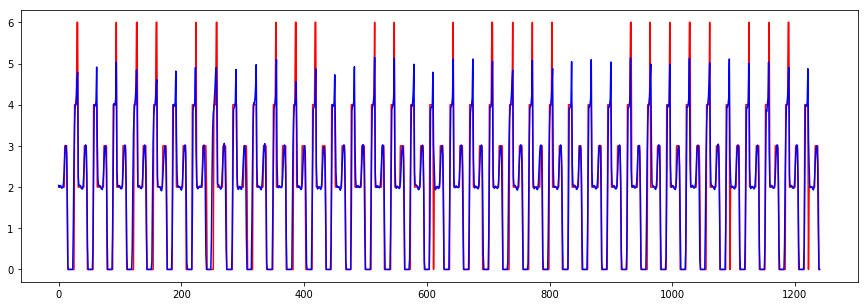

In [41]:
plt.figure(figsize=(15,5))

plt.plot(y_test, color='red', label='true')
plt.plot(y_pred, color='blue', label='pred')

In [43]:
eval_ = model.evaluate(X_test_t, y_test, batch_size=120)
eval_

1241/1241 [==============================] - 0s 172us/step


[0.4062708993768807, 0.8267526030540466]